# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [78]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.impute import SimpleImputer

import joblib
import warnings
warnings.filterwarnings('ignore')

# Set the style for visualizations
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [79]:
df = pd.read_csv('data.csv', sep=";")

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation / Preprocessing

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [81]:
print("\nSummary statistics:")
df.describe().T


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [82]:
# Let's check if there's a specific dropout indicator column
if 'Target' in df.columns:
  print("\nTarget variable distribution:")
  print(df['Target'].value_counts())
  target_column = 'Target'
else:
  # If no explicit target column, create one based on the data
  # For example, if students who didn't approve any curricular units in the first semester are considered at risk
  df['dropout_risk'] = (df['Curricular_units_1st_sem_approved'] == 0).astype(int)

  target_column = 'dropout_risk'
  print("\nCreated target variable distribution:")
  print(df[target_column].value_counts())


Created target variable distribution:
dropout_risk
0    3706
1     718
Name: count, dtype: int64



Exploring categorical variables...


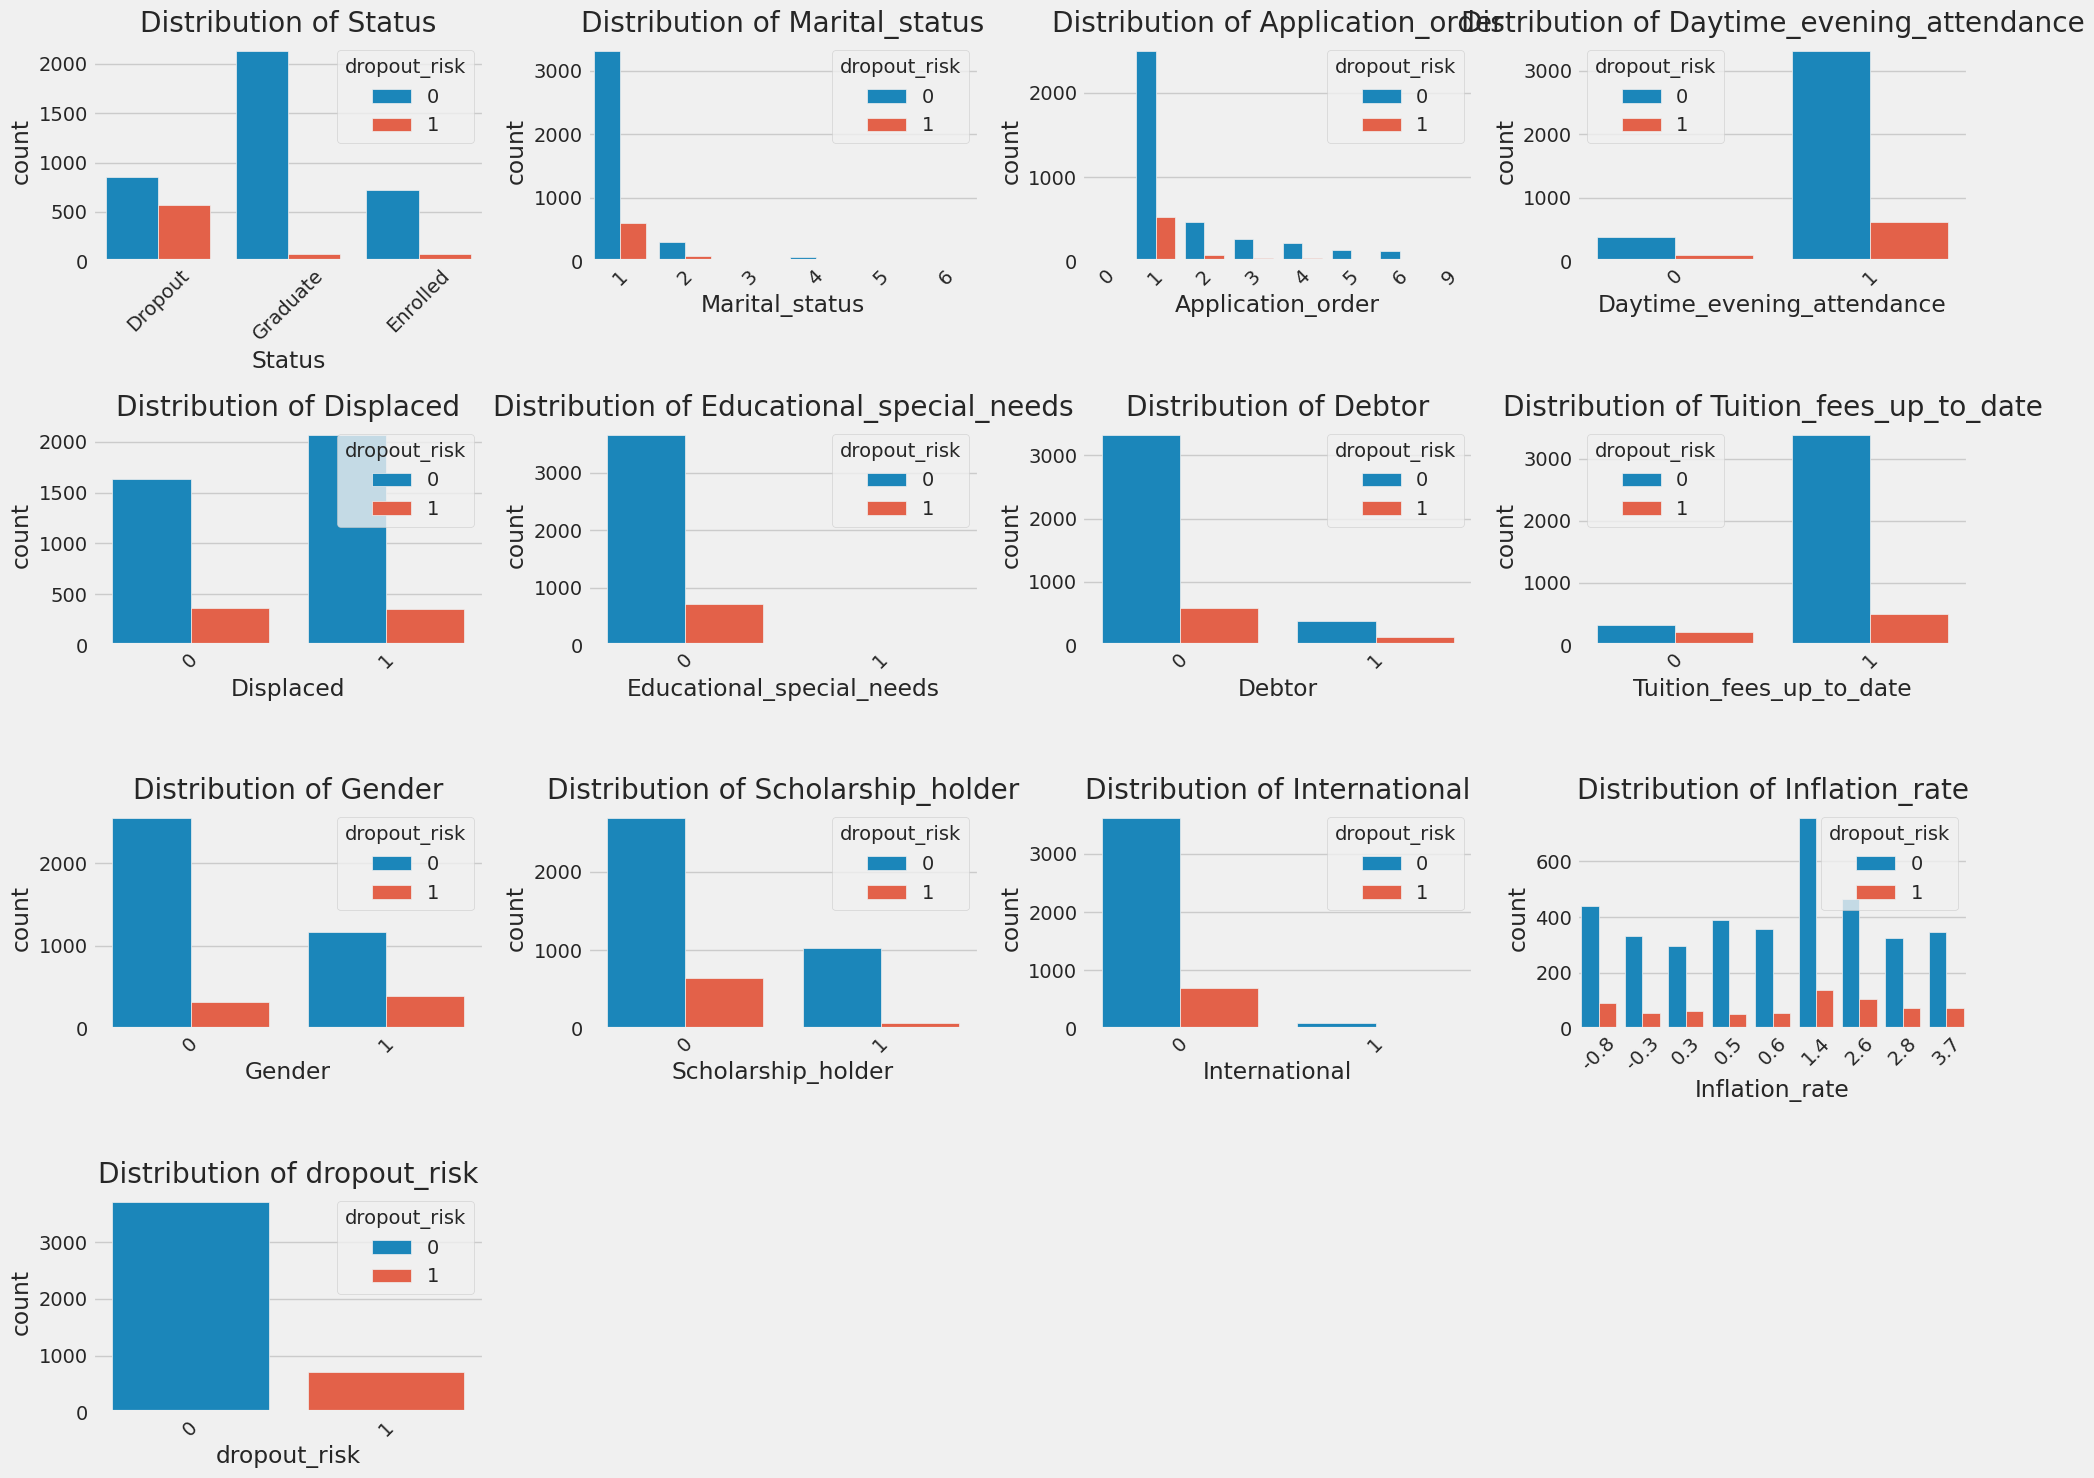

In [83]:
print("\nExploring categorical variables...")
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns += [col for col in df.columns if col not in df.select_dtypes(include=['object', 'category']).columns and df[col].nunique() < 10]

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns[:min(16, len(categorical_columns))]):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=col, data=df, hue=target_column if len(df[col].unique()) < 10 else None)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Exploring numerical variables...


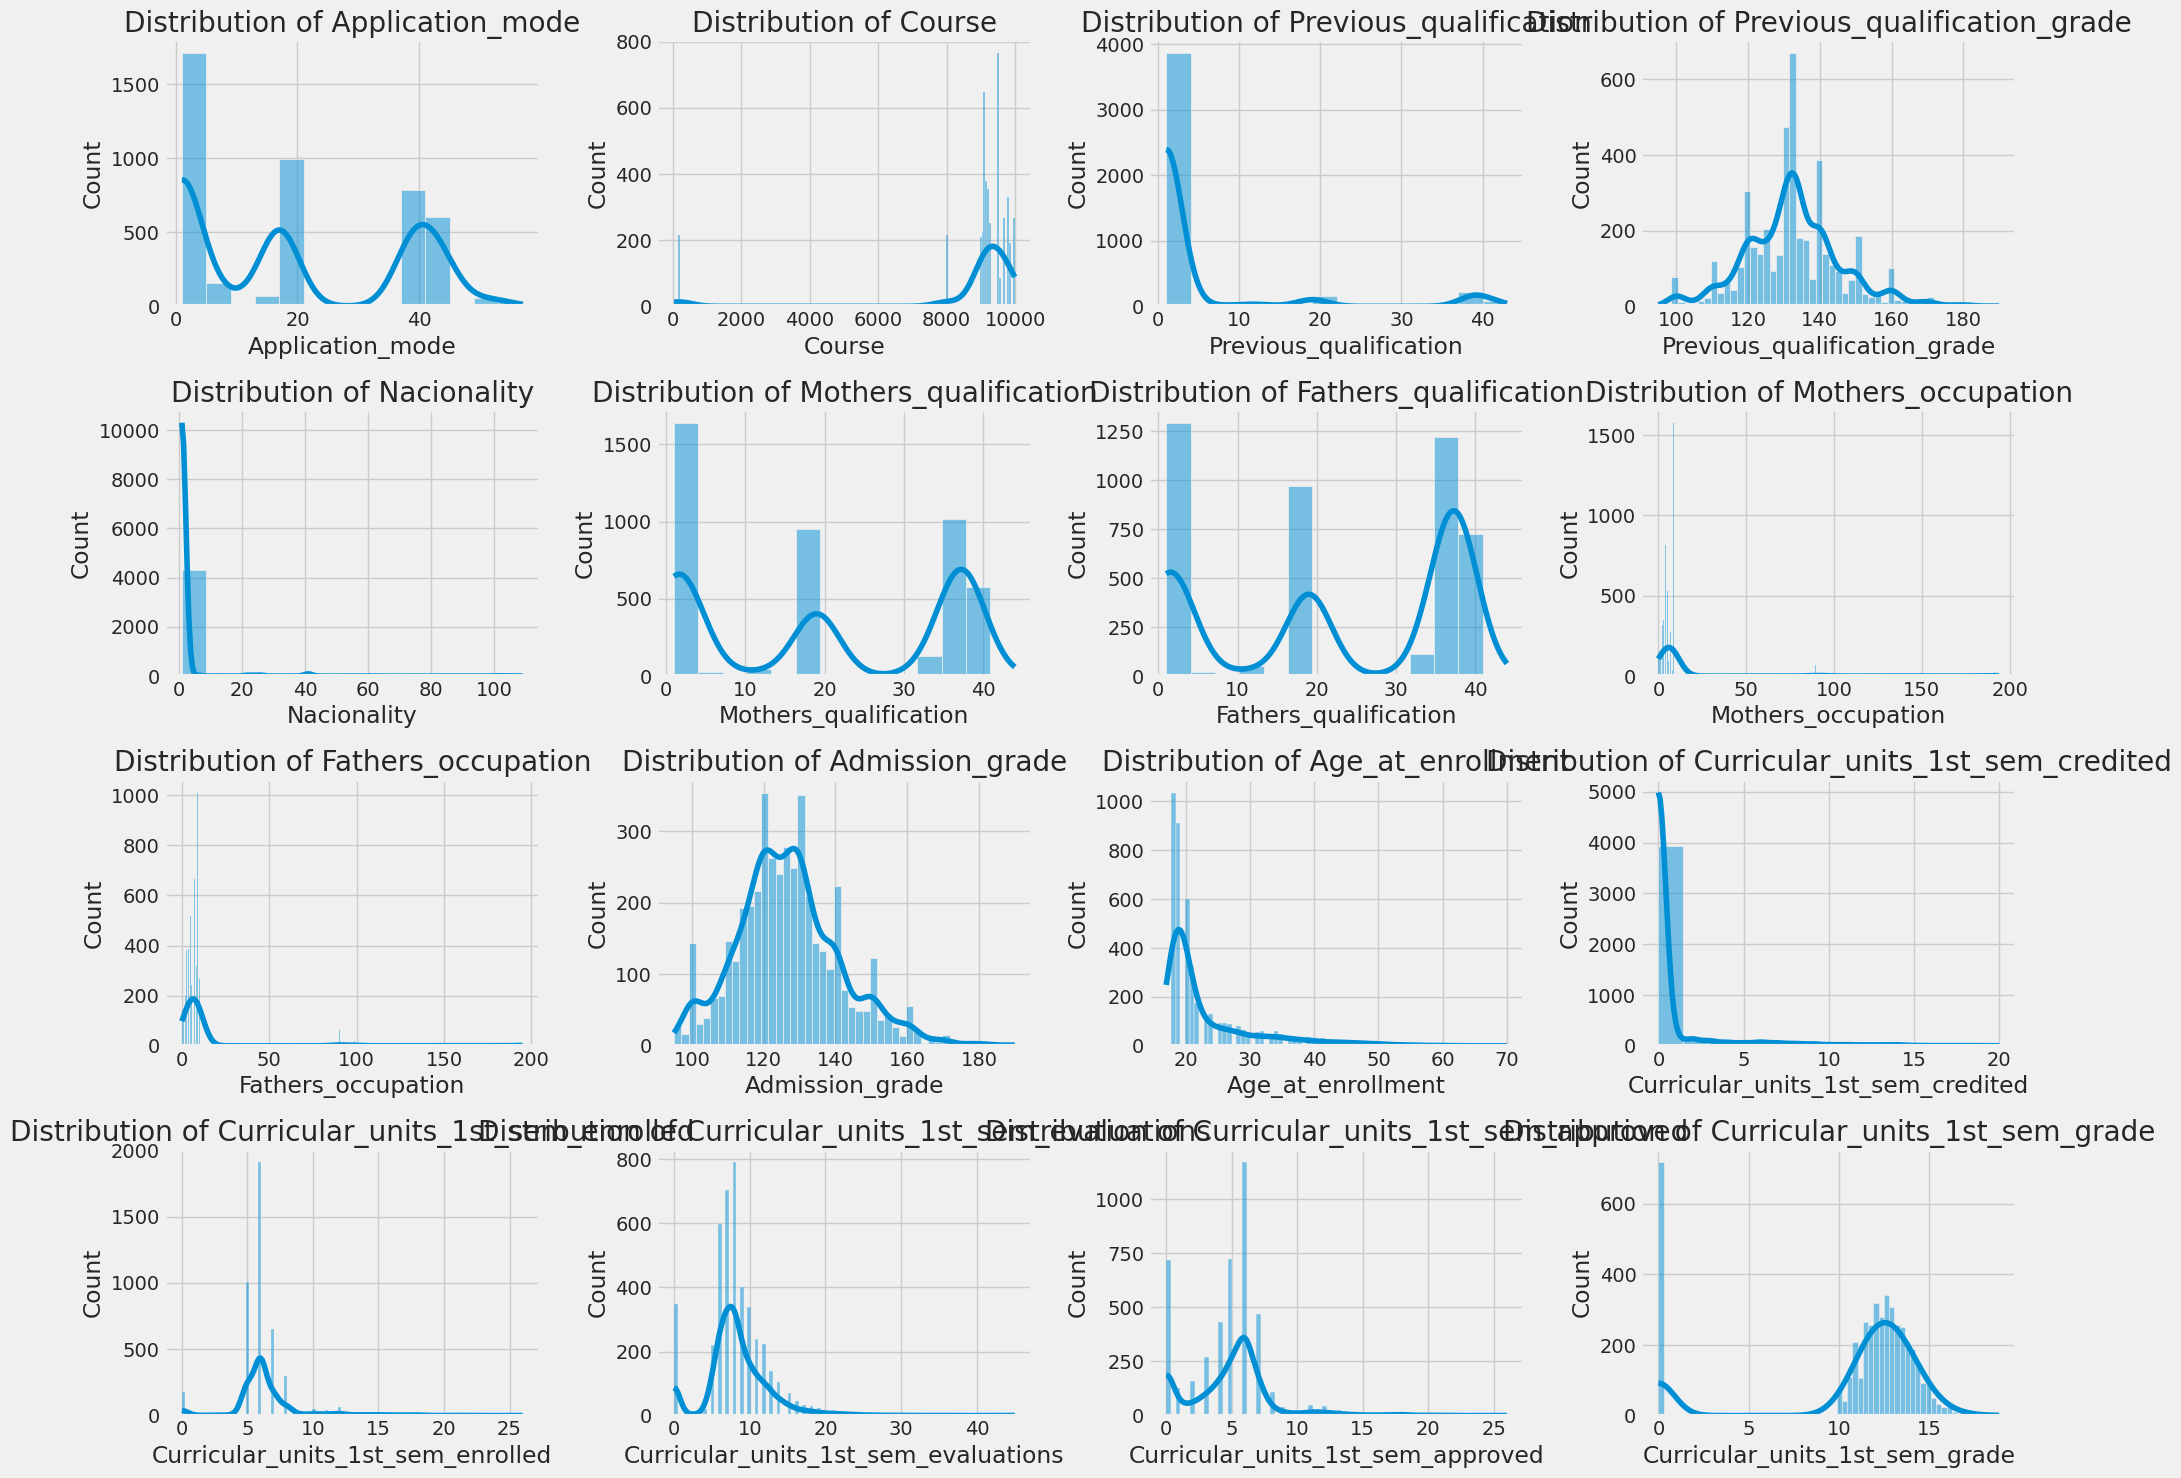

In [84]:
# 2.5.2 Distribution of numerical variables
print("\nExploring numerical variables...")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != target_column and df[col].nunique() > 10]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns[:min(16, len(numerical_columns))]):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

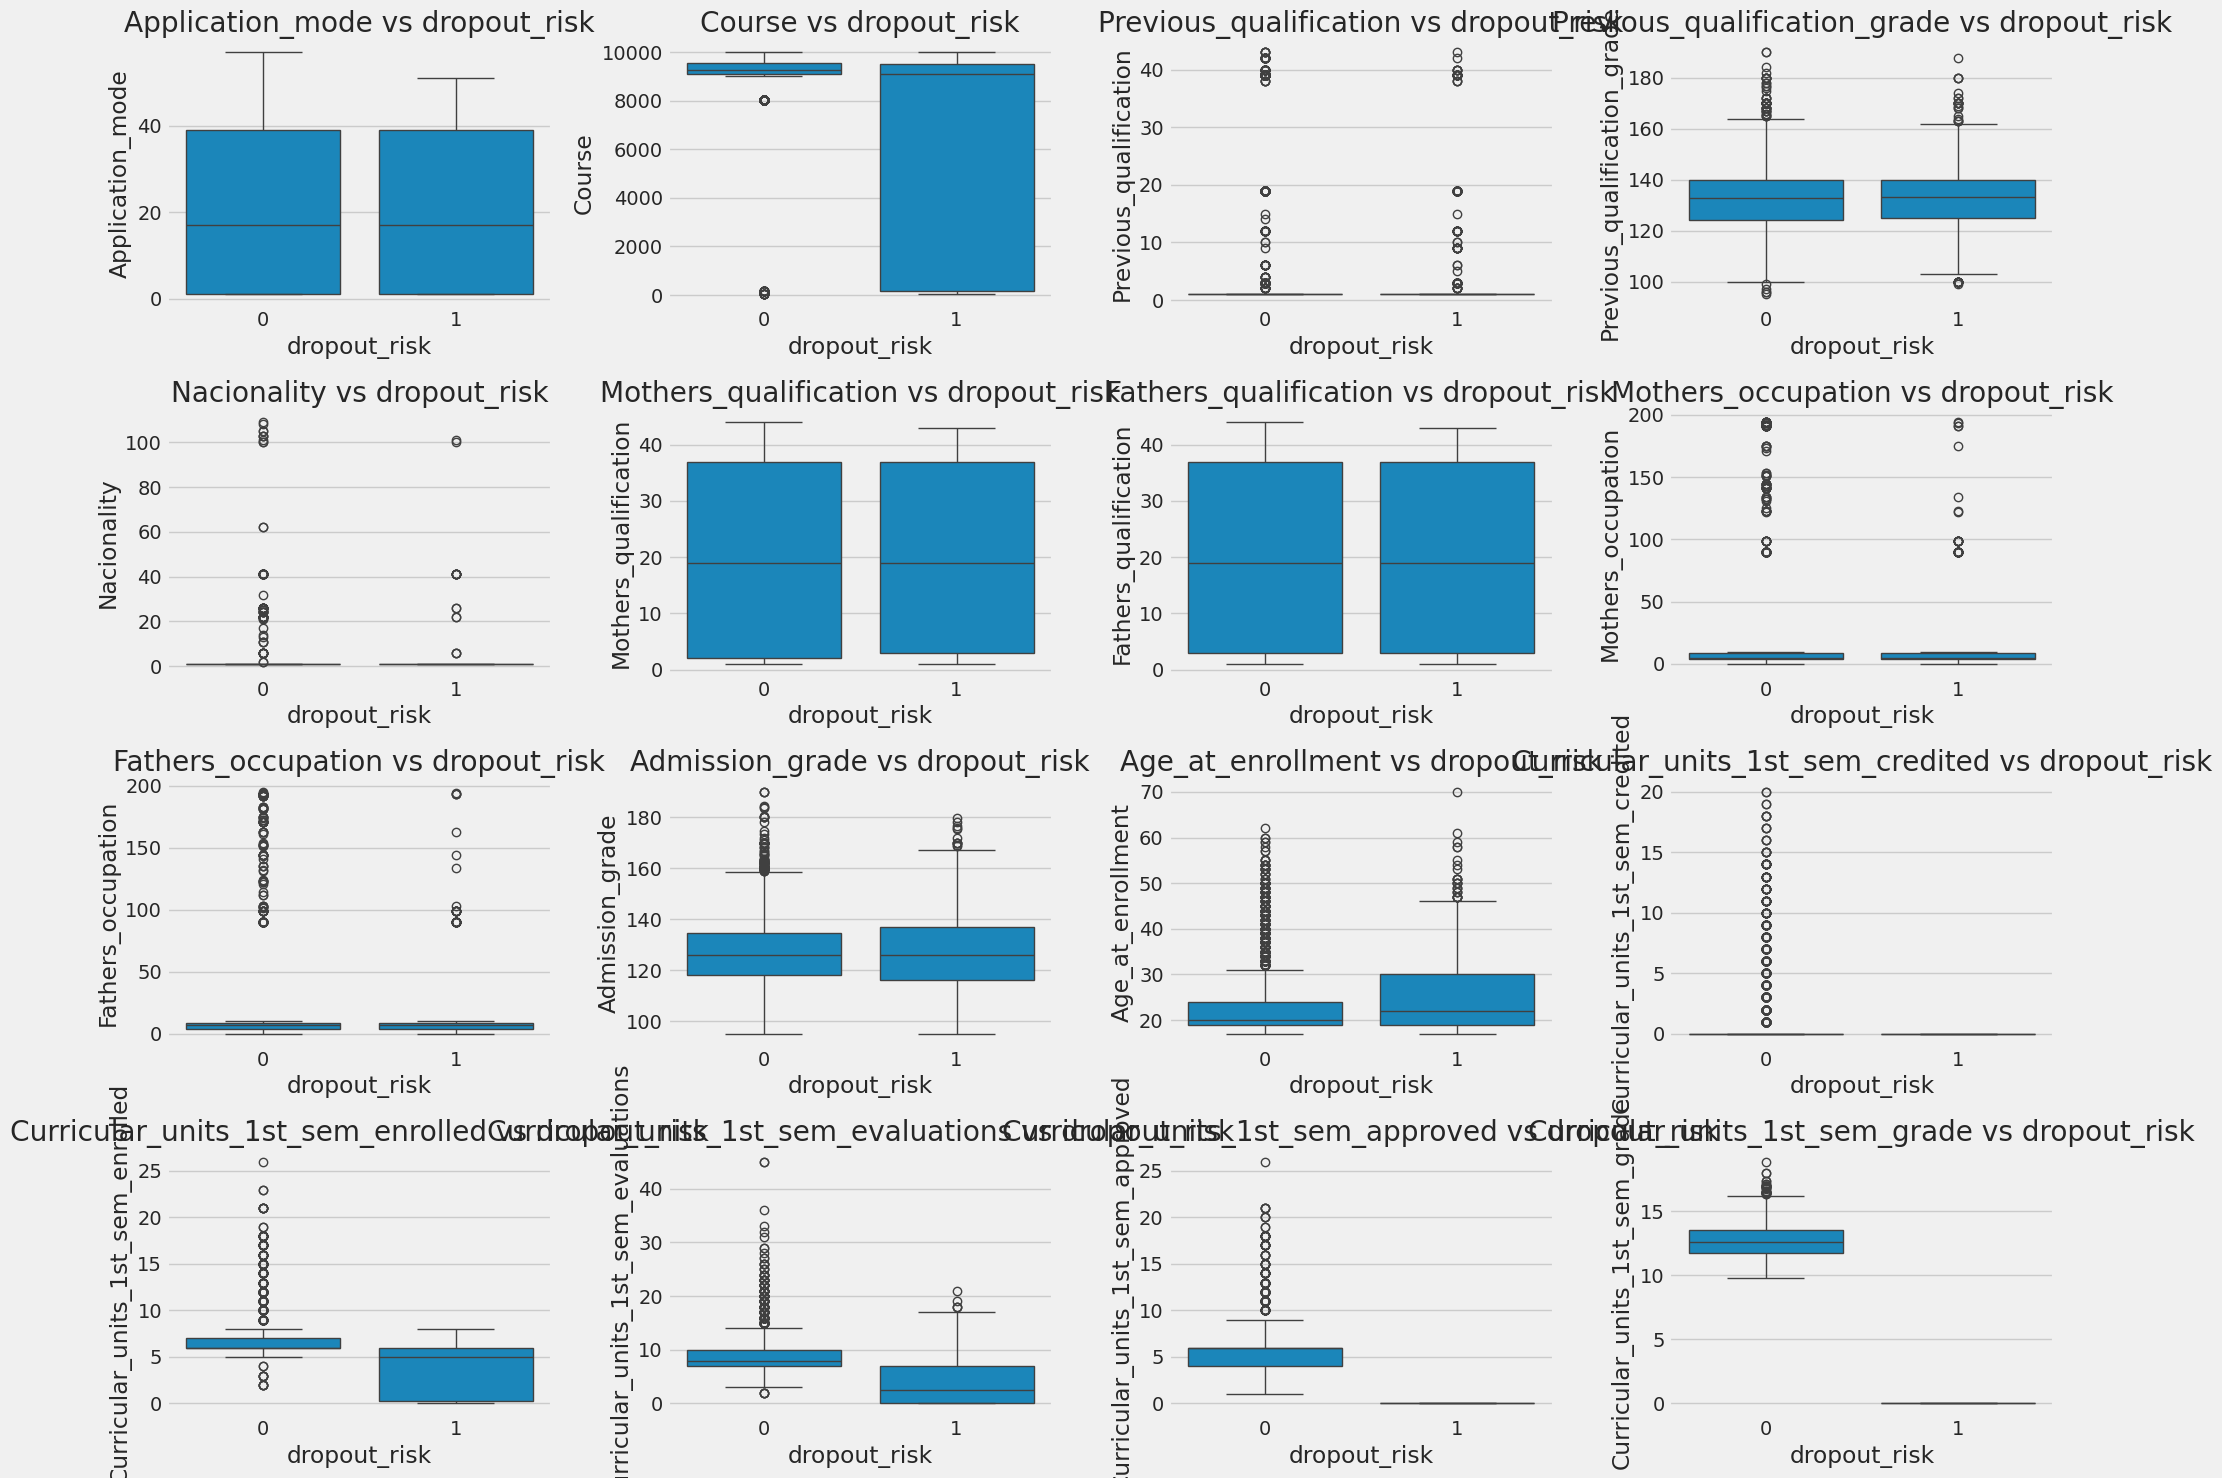

In [85]:
# 2.5.3 Relationship between numerical features and target
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns[:min(16, len(numerical_columns))]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=target_column, y=col, data=df)
    plt.title(f'{col} vs {target_column}')
plt.tight_layout()
plt.show()

In [86]:
# 2.5.5 Top correlated features with target
correlation_matrix = df[numerical_columns + [target_column]].corr()
target_correlations = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)
print("\nTop features correlated with target:")
print(target_correlations)


Top features correlated with target:
Age_at_enrollment                               0.140079
Application_mode                                0.089508
Curricular_units_1st_sem_without_evaluations    0.074687
Mothers_qualification                           0.016681
Mothers_occupation                              0.014414
Fathers_occupation                              0.009217
Previous_qualification                          0.007151
Previous_qualification_grade                    0.004167
Nacionality                                    -0.000084
Admission_grade                                -0.004872
Fathers_qualification                          -0.010097
Curricular_units_2nd_sem_credited              -0.122722
Curricular_units_1st_sem_credited              -0.132406
Curricular_units_1st_sem_enrolled              -0.374330
Curricular_units_2nd_sem_enrolled              -0.396929
Course                                         -0.401080
Curricular_units_1st_sem_evaluations           -0.

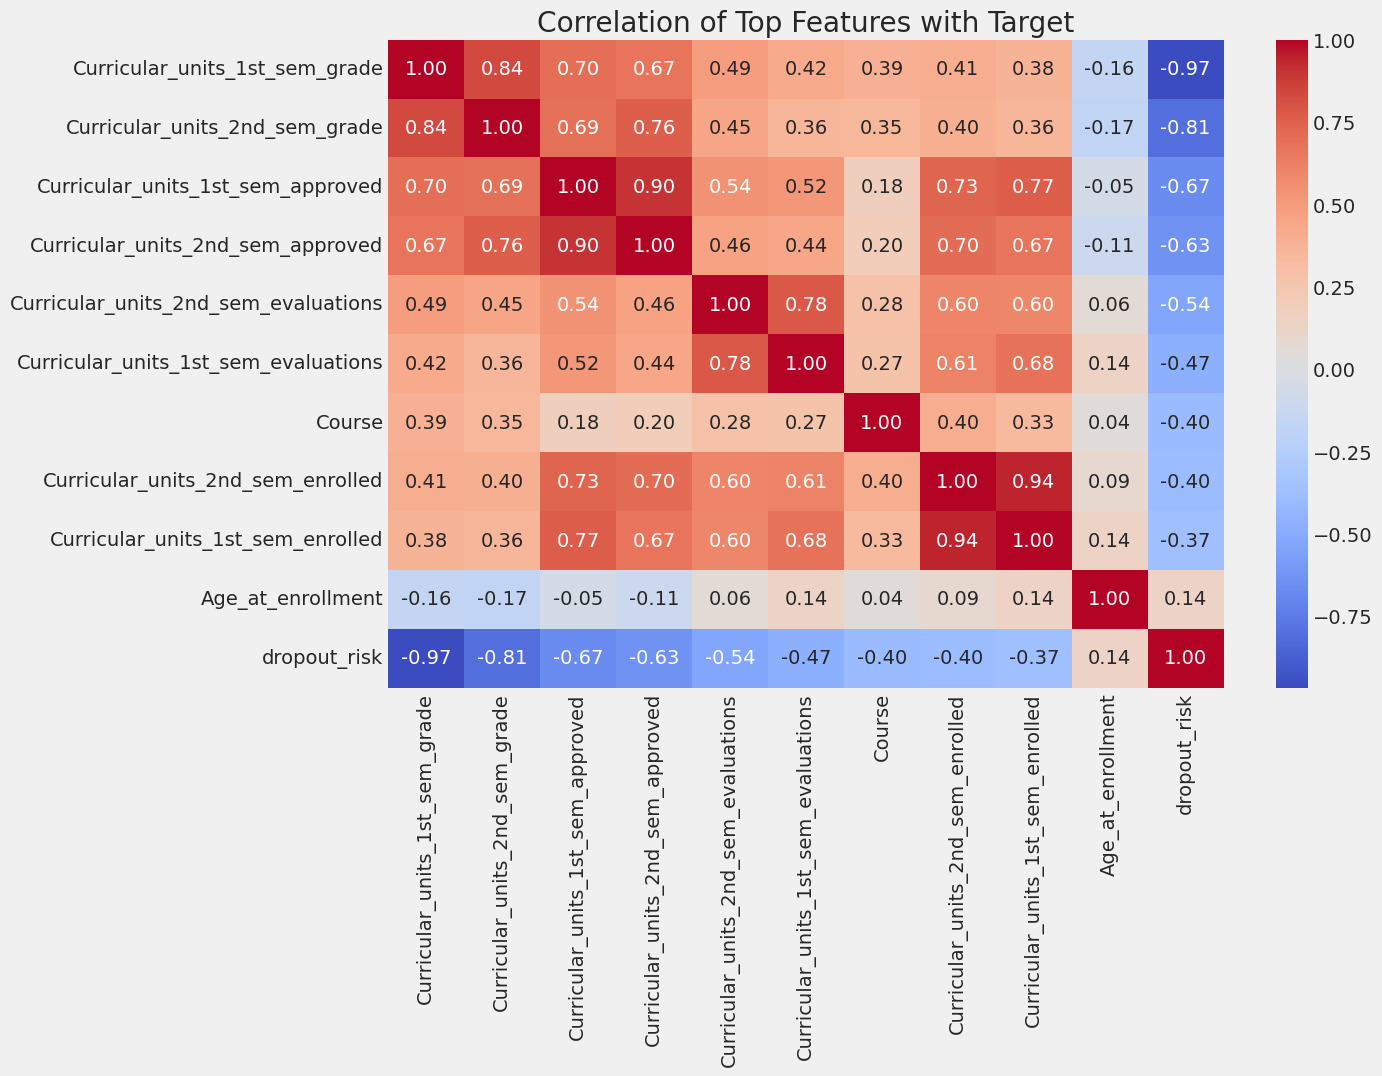

In [87]:
# Features with highest absolute correlation
top_features = target_correlations.abs().sort_values(ascending=False).head(10).index.tolist()
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features + [target_column]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Top Features with Target')
plt.show()

In [88]:
# 3.1 Identify categorical and numerical features
print("\nPreparing features for modeling...")

# Exclude the target variable from the feature list
features = [col for col in df.columns if col != target_column]
categorical_features = [col for col in categorical_columns if col in features]
numerical_features = [col for col in numerical_columns if col in features]

print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")


Preparing features for modeling...
Categorical features: 12
Numerical features: 22


In [89]:
# 3.2 Feature Preprocessing
# Set up preprocessing pipelines for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Modeling

In [90]:
# 4. Model Building

# 4.1 Split data into training and test sets
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (3539, 37), (3539,)
Test set shape: (885, 37), (885,)



Training Random Forest...
Random Forest Accuracy: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00       144

    accuracy                           1.00       885
   macro avg       1.00      1.00      1.00       885
weighted avg       1.00      1.00      1.00       885



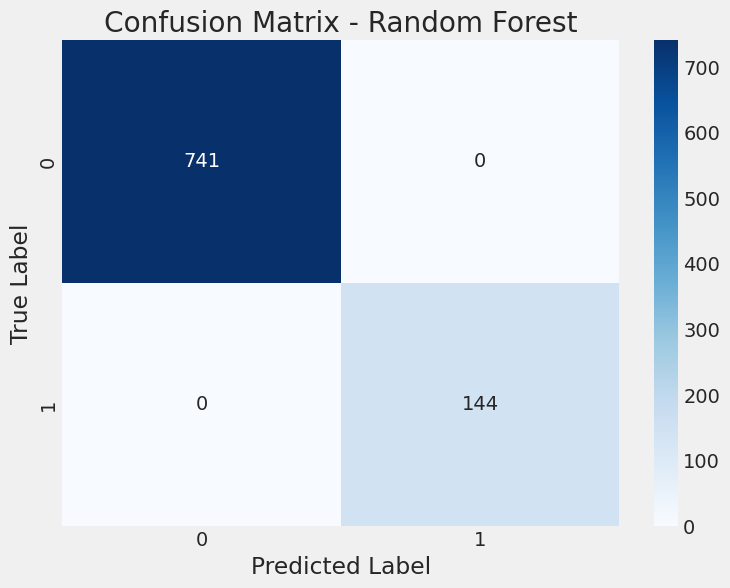

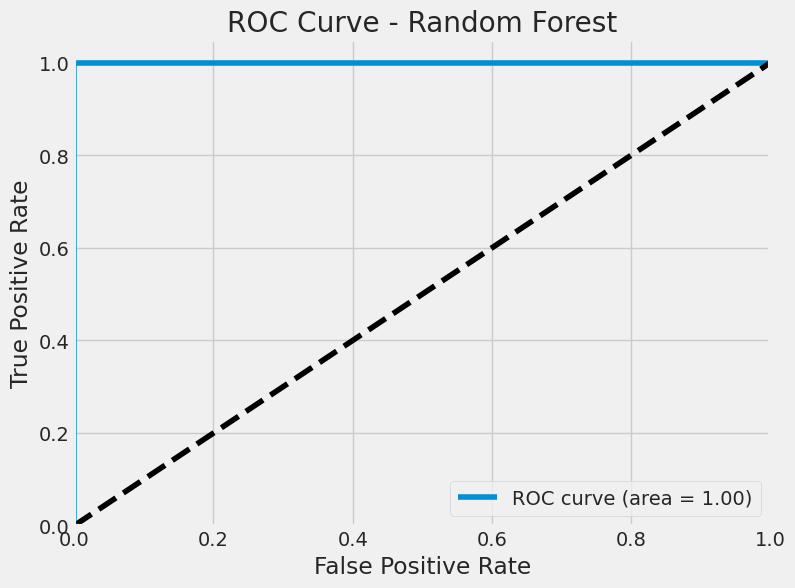

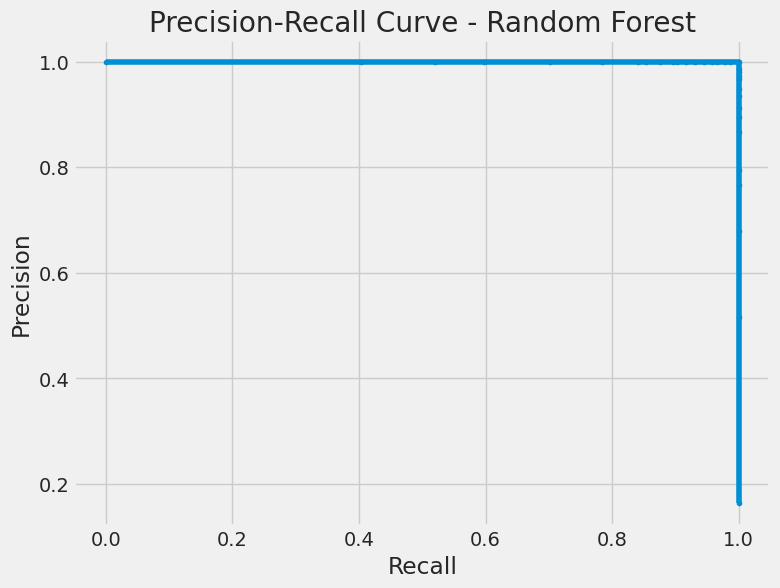


Training Gradient Boosting...
Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      1.00      1.00       144

    accuracy                           1.00       885
   macro avg       1.00      1.00      1.00       885
weighted avg       1.00      1.00      1.00       885



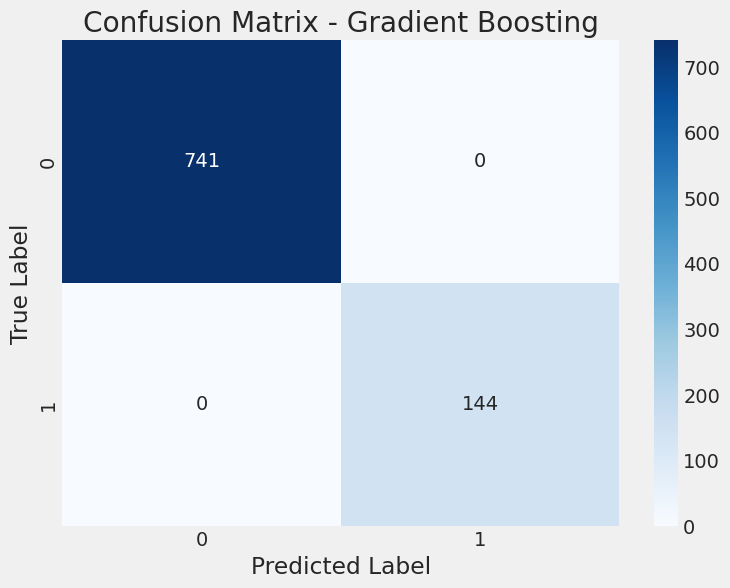

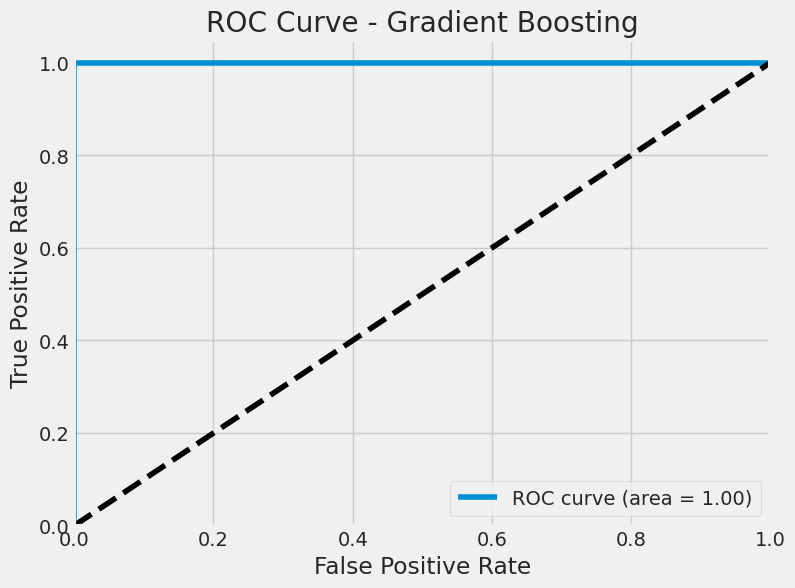

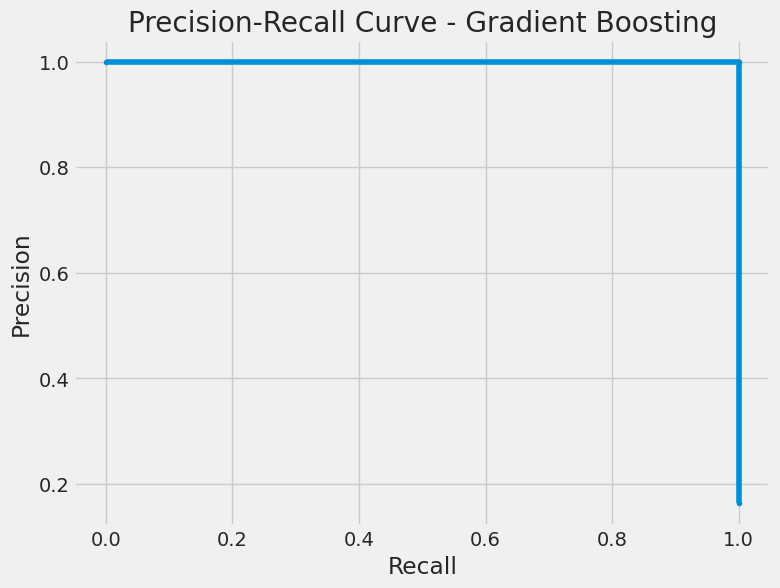

In [91]:
# 4.2 Build and evaluate multiple models
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    # Create a pipeline with preprocessing and classifier
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Train model
    pipe.fit(X_train, y_train)

    # Make predictions on test set
    y_pred = pipe.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{report}")

    # Save results
    results[name] = {
        'accuracy': accuracy,
        'model': pipe,
        'predictions': y_pred,
        'probabilities': pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, 'predict_proba') else None
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot ROC curve if probabilities are available
    if results[name]['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

        # Plot precision-recall curve
        precision, recall, _ = precision_recall_curve(y_test, results[name]['probabilities'])

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, marker='.')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {name}')
        plt.show()

## Evaluation


Best model: Random Forest with accuracy: 1.0000


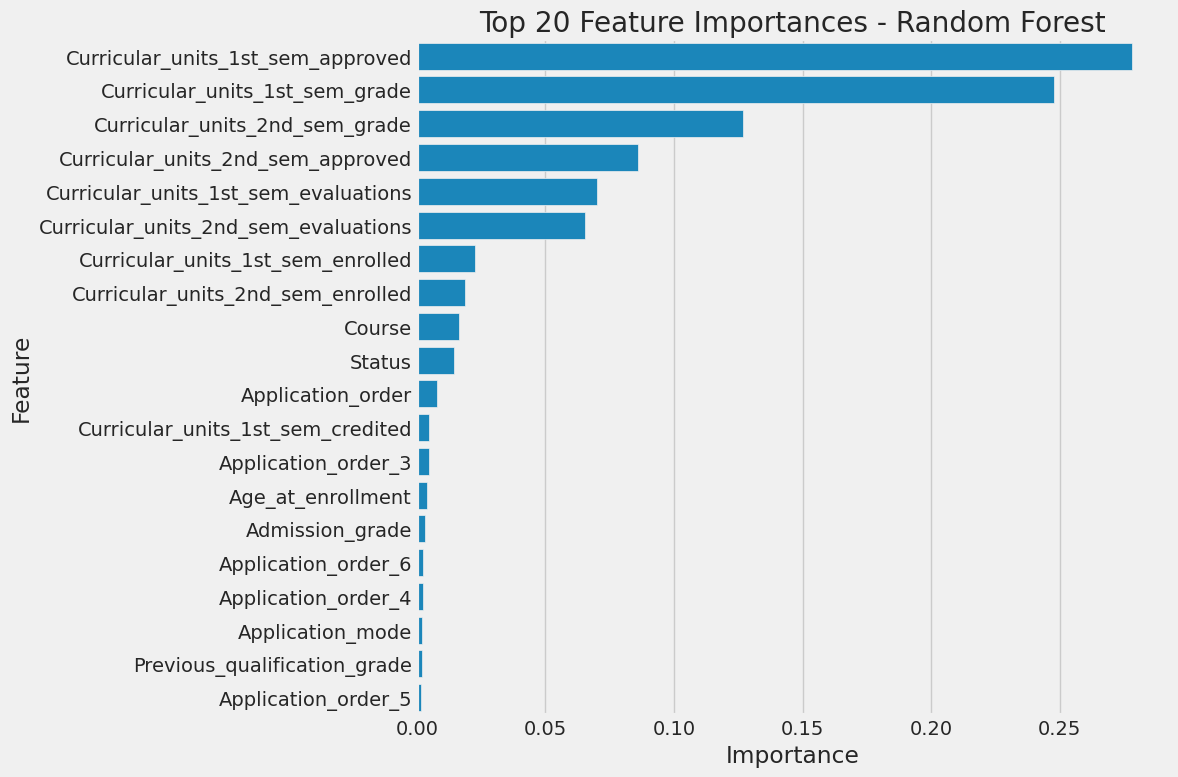


Top 20 important features:
                                 Feature  Importance
14     Curricular_units_1st_sem_approved    0.278200
15        Curricular_units_1st_sem_grade    0.247888
21        Curricular_units_2nd_sem_grade    0.126662
20     Curricular_units_2nd_sem_approved    0.085820
13  Curricular_units_1st_sem_evaluations    0.069988
19  Curricular_units_2nd_sem_evaluations    0.065350
12     Curricular_units_1st_sem_enrolled    0.022647
18     Curricular_units_2nd_sem_enrolled    0.018588
1                                 Course    0.016276
22                                Status    0.014318
24                     Application_order    0.007928
11     Curricular_units_1st_sem_credited    0.004785
46                   Application_order_3    0.004610
10                     Age_at_enrollment    0.003838
9                        Admission_grade    0.003059
49                   Application_order_6    0.002469
47                   Application_order_4    0.002334
0                 

In [92]:
# 5. Feature Importance Analysis
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']

print(f"\nBest model: {best_model_name} with accuracy: {results[best_model_name]['accuracy']:.4f}")

# Extract feature importances if the model supports it
if hasattr(best_model['classifier'], 'feature_importances_'):
    # Get feature names after one-hot encoding
    ohe_feature_names = []

    # Get the column transformer
    preprocessor = best_model['preprocessor']

    # Get the names of the categorical features after one-hot encoding
    cat_features = []
    # This is a simplified way to get feature names, might need adaptation
    for i, transformer in enumerate(preprocessor.transformers_):
        name, trans, columns = transformer
        if name == 'cat':
            try:
                cat_encoder = trans.named_steps['onehot']
                for col_idx, col_name in enumerate(columns):
                    for cat in cat_encoder.categories_[col_idx]:
                        cat_features.append(f"{col_name}_{cat}")
            except:
                pass

    # Add numerical feature names
    num_features = [col for _, _, cols in preprocessor.transformers_ for col in cols if isinstance(cols, list)]

    # Combine all feature names
    all_features = num_features + cat_features

    # Get feature importances
    importances = best_model['classifier'].feature_importances_

    # Create DataFrame for visualization
    features_df = pd.DataFrame({
        'Feature': all_features[:len(importances)],  # Ensure same length
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("\nTop 20 important features:")
    print(features_df.head(20))

In [93]:
# 7. Model Interpretation and Recommendations

print("\n=== Student Dropout Risk Analysis ===")
print("\nBased on our analysis, here are the key factors influencing dropout risk:")

if 'features_df' in locals():
    for i, (feature, importance) in enumerate(zip(features_df['Feature'].head(5), features_df['Importance'].head(5))):
        print(f"{i+1}. {feature}: {importance:.4f}")

print("\nRecommendations for Jaya Jaya Institut:")
print("1. Focus on early intervention for students with low first semester performance")
print("2. Establish additional support systems for at-risk students")
print("3. Create regular check-ins and mentoring opportunities")
print("4. Develop personalized academic plans for students showing warning signs")
print("5. Consider financial aid programs for students with economic difficulties")

print("\n=== Model Deployment Strategy ===")
print("1. Implement a monitoring system at the end of the first semester")
print("2. Flag students with high dropout probability for intervention")
print("3. Create an early warning dashboard for advisors")
print("4. Regularly retrain the model with new data")
print("5. Track intervention effectiveness to continuously improve the system")

# 8. Final thoughts and next steps
print("\n=== Next Steps ===")
print("1. Collect additional data on student engagement and participation")
print("2. Explore more complex models like neural networks or ensemble methods")
print("3. Conduct A/B testing of different intervention strategies")
print("4. Develop a user-friendly interface for academic advisors")
print("5. Expand the model to predict performance in addition to dropout risk")


=== Student Dropout Risk Analysis ===

Based on our analysis, here are the key factors influencing dropout risk:
1. Curricular_units_1st_sem_approved: 0.2782
2. Curricular_units_1st_sem_grade: 0.2479
3. Curricular_units_2nd_sem_grade: 0.1267
4. Curricular_units_2nd_sem_approved: 0.0858
5. Curricular_units_1st_sem_evaluations: 0.0700

Recommendations for Jaya Jaya Institut:
1. Focus on early intervention for students with low first semester performance
2. Establish additional support systems for at-risk students
3. Create regular check-ins and mentoring opportunities
4. Develop personalized academic plans for students showing warning signs
5. Consider financial aid programs for students with economic difficulties

=== Model Deployment Strategy ===
1. Implement a monitoring system at the end of the first semester
2. Flag students with high dropout probability for intervention
3. Create an early warning dashboard for advisors
4. Regularly retrain the model with new data
5. Track interven

In [94]:
# Save the best model (either tuned or original)
if 'tuned_model' in locals():
    final_model = best_model
    joblib.dump(final_model, 'student_dropout_prediction_model.pkl')
    print("\nTuned model saved as 'student_dropout_prediction_model.pkl'")
else:
    joblib.dump(best_model, 'student_dropout_prediction_model.pkl')
    print("\nBest model saved as 'student_dropout_prediction_model.pkl'")


Tuned model saved as 'student_dropout_prediction_model.pkl'
